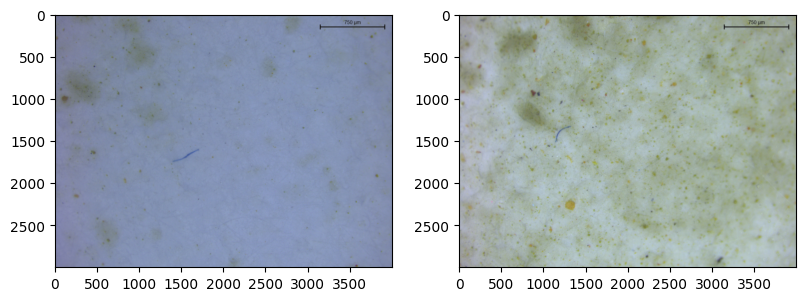

In [20]:
import os
import numpy as np
import skimage as ski
from skimage.io import imread
import matplotlib.pyplot as plt

claro_fibra_azul_claro = imread('./Fibras/Imagenes_de_fibras/Fibras_a_tener_en_cuenta/Fondo_claro/Fibra_azul_claro.jpg')
claro_fibra_azul_oscuro = imread('./Fibras/Imagenes_de_fibras/Fibras_a_tener_en_cuenta/Fondo_claro/Fibra_azul_oscuro.jpg')
claro_fibre_negra = imread('./Fibras/Imagenes_de_fibras/Fibras_a_tener_en_cuenta/Fondo_claro/Fibra_negra.jpg')
claro_fibra_rosa = imread('./Fibras/Imagenes_de_fibras/Fibras_a_tener_en_cuenta/Fondo_claro/Fibra_rosa.jpg')

oscuro_fibra_azul = imread('./Fibras/Imagenes_de_fibras/Fibras_a_tener_en_cuenta/Fondo_oscuro/Fibra_azul.jpg')
oscuro_fibra_naranja = imread('./Fibras/Imagenes_de_fibras/Fibras_a_tener_en_cuenta/Fondo_oscuro/Fibra_naranja.jpg')
oscuro_fibra_negra = imread('./Fibras/Imagenes_de_fibras/Fibras_a_tener_en_cuenta/Fondo_oscuro/Fibra_negra.jpg')
oscuro_fibra_rosa = imread('./Fibras/Imagenes_de_fibras/Fibras_a_tener_en_cuenta/Fondo_oscuro/Fibra_rosa.jpg')
oscuro_fibra_roja = imread('./Fibras/Imagenes_de_fibras/Fibras_a_tener_en_cuenta/Fondo_oscuro/Fibra_roja.jpg')

plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1)
plt.imshow(claro_fibra_azul_claro)
plt.subplot(1, 4, 2)
plt.imshow(oscuro_fibra_azul)


In [21]:
print(claro_fibra_azul_claro)
print(oscuro_fibra_azul)

[[[117 123 145]
  [117 123 145]
  [120 125 147]
  ...
  [120 127 153]
  [121 128 156]
  [121 128 157]]

 [[117 123 145]
  [118 124 146]
  [119 124 146]
  ...
  [121 129 152]
  [121 128 156]
  [121 128 156]]

 [[117 123 145]
  [118 124 146]
  [119 124 146]
  ...
  [120 128 151]
  [121 128 154]
  [121 128 154]]

 ...

 [[117 121 159]
  [116 120 158]
  [118 122 159]
  ...
  [122 131 162]
  [120 129 158]
  [121 130 159]]

 [[117 121 159]
  [116 120 158]
  [120 124 161]
  ...
  [121 132 162]
  [119 130 160]
  [119 130 160]]

 [[116 120 158]
  [117 121 159]
  [121 125 162]
  ...
  [119 130 160]
  [119 130 160]
  [118 129 159]]]
[[[149 159 150]
  [150 160 151]
  [150 160 149]
  ...
  [145 154 135]
  [147 154 136]
  [147 154 136]]

 [[150 160 151]
  [149 159 150]
  [149 159 148]
  ...
  [144 153 134]
  [146 155 136]
  [146 155 136]]

 [[149 159 150]
  [149 159 150]
  [149 159 148]
  ...
  [141 153 133]
  [143 154 137]
  [144 155 138]]

 ...

 [[145 140 118]
  [143 141 118]
  [146 144 121]
  ..

Grises

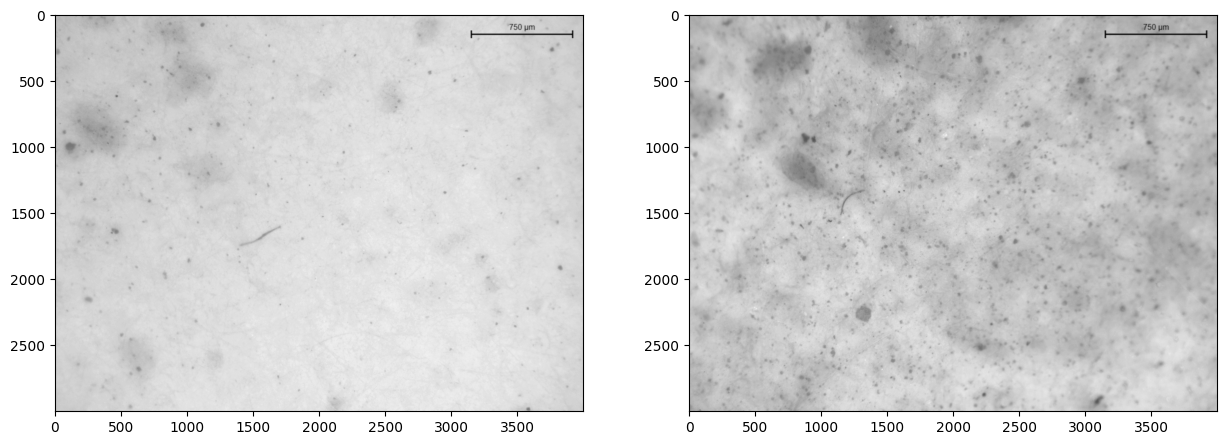

In [22]:
claro_fibra_azul_claro_gris = np.mean(claro_fibra_azul_claro, axis=2)
oscuro_fibra_azul_gris = np.mean(oscuro_fibra_azul, axis=2)

fig, ax = plt.subplots(1,2, figsize=(15,15))
ax[0].imshow(claro_fibra_azul_claro_gris, cmap='gray')
ax[1].imshow(oscuro_fibra_azul_gris, cmap='gray')

Invertir

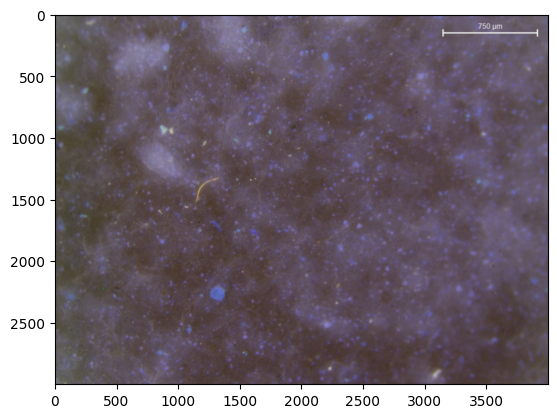

In [23]:
oscuro_fibra_azul_inv = 255 - oscuro_fibra_azul
plt.imshow(oscuro_fibra_azul_inv)

Media de los pixeles

147.602937
166.38083702777777


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


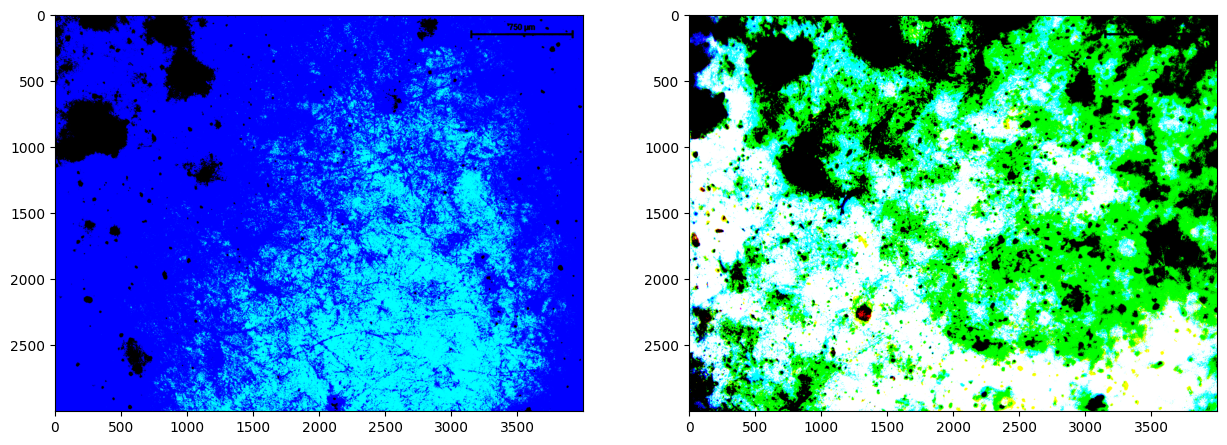

In [33]:
#Compute ther average between the pixel value of fondo claro and fondo oscuro and subtract it from the image
#to obtain the image with the background removed
fondo_claro = np.mean(claro_fibra_azul_claro)
fondo_oscuro = np.mean(oscuro_fibra_azul)

print(fondo_claro)
print(fondo_oscuro)

claro_fibra_azul_claro_sin_fondo = claro_fibra_azul_claro - fondo_claro
oscuro_fibra_azul_sin_fondo = oscuro_fibra_azul - fondo_oscuro

fig, ax = plt.subplots(1,2, figsize=(15,15))
ax[0].imshow(claro_fibra_azul_claro_sin_fondo)
ax[1].imshow(oscuro_fibra_azul_sin_fondo)

Edge Detection

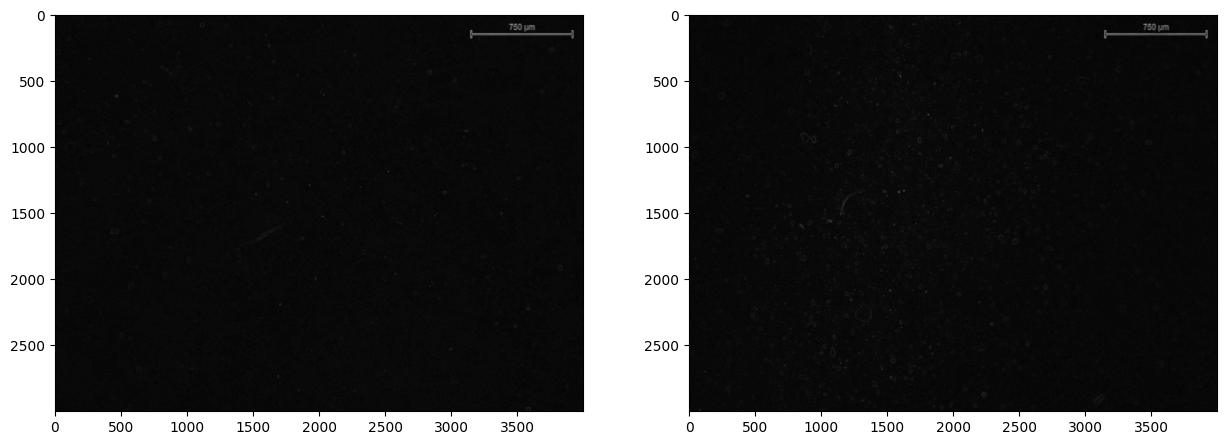

: 

In [38]:
from skimage import filters, feature

#Apply canny edge detector to the image
claro_fibra_azul_claro_sin_fondo_canny = filters.roberts(claro_fibra_azul_claro_gris)
oscuro_fibra_azul_sin_fondo_canny = filters.roberts(oscuro_fibra_azul_gris)

fig, ax = plt.subplots(1,2, figsize=(15,15))
ax[0].imshow(claro_fibra_azul_claro_sin_fondo_canny, cmap='gray')
ax[1].imshow(oscuro_fibra_azul_sin_fondo_canny, cmap='gray')

In [25]:
#Transform all images to grey scale and save them in a new folder
"""
os.mkdir('./Fibras/Imagenes_de_fibras/Fibras_a_tener_en_cuenta/grey_scale')

for i in os.listdir('./Fibras/Imagenes_de_fibras/Fibras_a_tener_en_cuenta/Fondo_claro'):
    image = imread('./Fibras/Imagenes_de_fibras/Fibras_a_tener_en_cuenta/Fondo_claro/' + i)
    image = np.mean(image, axis=2)
    plt.imsave('./Fibras/Imagenes_de_fibras/Fibras_a_tener_en_cuenta/grey_scale/' + i, image, cmap='gray')

for i in os.listdir('./Fibras/Imagenes_de_fibras/Fibras_a_tener_en_cuenta/Fondo_oscuro'):
    image = imread('./Fibras/Imagenes_de_fibras/Fibras_a_tener_en_cuenta/Fondo_oscuro/' + i)
    image = np.mean(image, axis=2)
    plt.imsave('./Fibras/Imagenes_de_fibras/Fibras_a_tener_en_cuenta/grey_scale/' + i, image, cmap='gray')
"""


"\nos.mkdir('./Fibras/Imagenes_de_fibras/Fibras_a_tener_en_cuenta/grey_scale')\n\nfor i in os.listdir('./Fibras/Imagenes_de_fibras/Fibras_a_tener_en_cuenta/Fondo_claro'):\n    image = imread('./Fibras/Imagenes_de_fibras/Fibras_a_tener_en_cuenta/Fondo_claro/' + i)\n    image = np.mean(image, axis=2)\n    plt.imsave('./Fibras/Imagenes_de_fibras/Fibras_a_tener_en_cuenta/grey_scale/' + i, image, cmap='gray')\n\nfor i in os.listdir('./Fibras/Imagenes_de_fibras/Fibras_a_tener_en_cuenta/Fondo_oscuro'):\n    image = imread('./Fibras/Imagenes_de_fibras/Fibras_a_tener_en_cuenta/Fondo_oscuro/' + i)\n    image = np.mean(image, axis=2)\n    plt.imsave('./Fibras/Imagenes_de_fibras/Fibras_a_tener_en_cuenta/grey_scale/' + i, image, cmap='gray')\n"